In [3]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm
from collections import Counter

In [4]:
def occurrence_of_days_of_week(data_frame):
    M = np.sum(data_frame['Mon'])
    T = np.sum(data_frame['Tue'])
    W = np.sum(data_frame['Wed'])
    Th = np.sum(data_frame['Thu'])
    F = np.sum(data_frame['Fri'])
    S = np.sum(data_frame['Sat'])
    Su = np.sum(data_frame['Sun'])
    week = [1]*M + [2]*T + [3]*W + [4]*Th + [5]*F + [6]*S + [7]*Su
    return week

def hours_occurring_on(data_frame, Day):
    day = data_frame[['Hour', Day]].as_matrix()
    day_hour = np.array([day[:,0]//100])
    day_occurrence = np.array([day[:,1]])
    day_occ = np.concatenate((day_hour.T, day_occurrence.T), axis=1)
    out = []
    for i in range(0, day_occ.shape[0]):
        if day_occ[i, 1]==1:
            out.append(day_occ[i,0])
    return out

def make_dataframe_of_weekday_and_hour_occurrence(data_frame):
    Monday = hours_occurring_on(data_frame, 'Mon')
    Tuesday = hours_occurring_on(data_frame, 'Tue')
    Wednesday = hours_occurring_on(data_frame, 'Wed')
    Thursday = hours_occurring_on(data_frame, 'Thu')
    Friday = hours_occurring_on(data_frame, 'Fri')
    Saturday = hours_occurring_on(data_frame, 'Sat')
    Sunday = hours_occurring_on(data_frame, 'Sun')
    Mon_count = Counter(Monday)
    Tue_count = Counter(Tuesday)
    Wed_count = Counter(Wednesday)
    Thu_count = Counter(Thursday)
    Fri_count = Counter(Friday)
    Sat_count = Counter(Saturday)
    Sun_count = Counter(Sunday)
    M = [Mon_count[i] for i in Mon_count]
    T = [Tue_count[i] for i in Mon_count]
    W = [Wed_count[i] for i in Mon_count]
    Th = [Thu_count[i] for i in Mon_count]
    F = [Fri_count[i] for i in Mon_count]
    S = [Sat_count[i] for i in Mon_count]
    Su = [Sun_count[i] for i in Mon_count]
    
    day_count = [Mon_count, Tue_count, Wed_count, Thu_count, Fri_count, Sat_count, Sun_count]
    label = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
    df = []
    for day, label in zip(day_count, label):
        X = pd.DataFrame(dict(day), index=[label])
        df.append(X)
    df = pd.concat(df, axis=0)
    df = df.transpose()
    df['sum_of_occurrence'] = df.sum(axis=1)
    
    perc = np.zeros((24,7))
    for hour in range(0,24):
        for ind, day in enumerate(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']):
            out = df.iloc[hour][day] / df.iloc[hour]['sum_of_occurrence']
            perc[hour, ind] = out
    return [df, perc]

In [13]:
def plot_frequency_of_movement_on_weekdays(data_frame):
    week = occurrence_of_days_of_week(data_frame)
    plt.figure(figsize=(8,6))
    num_bins = 13
    plt.style.use('ggplot')
    x = [1,2,3,4,5,6,7]
    labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    n, bins, patches = plt.hist(week, num_bins, facecolor='orange', alpha=1)
    plt.title('Frequency of Movement During\nDifferent Days of a Week')
    plt.xticks(x, labels, rotation='vertical')
    plt.xlabel('Days of a Week')
    plt.ylabel('Number of Data Points')
    plt.show()

def plot_frequency_of_movement_in_each_hour(data_frame):
    hours = data_frame['Hour']//100
    num_bins = 35
    plt.style.use('ggplot')
    n, bins, patches = plt.hist(hours, num_bins, facecolor='orange', alpha=1)
    x = np.linspace(0, 23, 24)
    labels = ['12 am', '1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am',
             '11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm',
             '10 pm','11 pm']
    plt.xticks(x, labels, rotation='vertical')
    plt.title('Number of points recorded\nin each hour of day')
    plt.xlabel('Hour')
    plt.ylabel('Number of points')
    plt.show()
    
def plot_overlapping_histograms_of_movement_on_weekdays(data_frame):
    plt.figure(figsize=(8,8))
    num_bins = 35
    plt.style.use('ggplot')
    Monday = hours_occurring_on(data_frame, 'Mon')
    Tuesday = hours_occurring_on(data_frame, 'Tue')
    Wednesday = hours_occurring_on(data_frame, 'Wed')
    Thursday = hours_occurring_on(data_frame, 'Thu')
    Friday = hours_occurring_on(data_frame, 'Fri')
    Saturday = hours_occurring_on(data_frame, 'Sat')
    Sunday = hours_occurring_on(data_frame, 'Sun')
    
    plt.hist([Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday],
             num_bins,
             alpha=0.8,
             label=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
             )
    
    plt.title('Frequency of Movement')
    x = np.linspace(0, 23, 24)
    labels = ['12 am', '1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am',
              '11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm',
              '10 pm','11 pm']
    plt.xticks(x, labels, rotation='vertical')
    plt.xlabel('Hour')
    plt.ylabel('Number of Data Points')
    plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', borderaxespad=0.)
    plt.show()   
    
def stacked_histogram_plot_of_movement_on_weekdays(data_frame):
    plt.figure(figsize=(8,8))
    Monday = hours_occurring_on(data_frame, 'Mon')
    Tuesday = hours_occurring_on(data_frame, 'Tue')
    Wednesday = hours_occurring_on(data_frame, 'Wed')
    Thursday = hours_occurring_on(data_frame, 'Thu')
    Friday = hours_occurring_on(data_frame, 'Fri')
    Saturday = hours_occurring_on(data_frame, 'Sat')
    Sunday = hours_occurring_on(data_frame, 'Sun')
    plt.hist([Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday],
             35,
             label=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
             stacked=True,normed=True
            )
    plt.title('Frequency of Movement')
    x = np.linspace(0, 23, 24)
    labels = ['12 am', '1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am',
              '11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm',
              '10 pm','11 pm']
    plt.xticks(x, labels, rotation='vertical')
    plt.xlabel('Hour')
    plt.ylabel('Number of Data Points')
    plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', borderaxespad=0.)
    plt.show()
    
def plot_bar_of_movement_on_weekdays(data_frame):
    [df, perc] = make_dataframe_of_weekday_and_hour_occurrence(data_frame)
    df = df.drop('sum_of_occurrence', 1)
    plt.figure(figsize=(10,10))
    df.plot.bar(figsize=(8,8))
    plt.show()
    
def plot_stacked_histogram_of_movement_on_weekdays(data_frame):
    [df, perc] = make_dataframe_of_weekday_and_hour_occurrence(data_frame)
    df = df.drop('sum_of_occurrence', 1)
    df.plot.bar(figsize=(8,8), stacked='True')
    x = np.linspace(0, 23, 24)
    labels = ['12 am', '1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am',
              '11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm',
              '10 pm','11 pm']
    plt.title('Frequency of Movement')
    plt.xticks(x, labels, rotation='vertical')
    plt.xlabel('Hour')
    plt.ylabel('Number of Data Points')
    plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', borderaxespad=0.)
    plt.gca().yaxis.grid(True)
    plt.show()
    
def plot_stacked_histogram_percentage_of_movement_on_weekdays(data_frame):
    [df, perc] = make_dataframe_of_weekday_and_hour_occurrence(data_frame)
    df = df.drop('sum_of_occurrence', 1)
    perc = pd.DataFrame(perc)
    label=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.figure(figsize=(8,8))
    ax = plt.axes()
    for i, day in zip(range(0,7), label):
        plt.scatter(perc.index,perc[i], s=(np.pi*(1000*perc[0]**2)), label=day)
    x = np.linspace(0, 23, 24)
    labels = ['12 am', '1 am','2 am','3 am','4 am','5 am','6 am','7 am','8 am','9 am','10 am',
              '11 am','12 pm','1 pm','2 pm','3 pm','4 pm','5 pm','6 pm','7 pm','8 pm','9 pm',
              '10 pm','11 pm']
    plt.xticks(x, labels, rotation='vertical')
    plt.xlabel('Hour')
    plt.ylabel('Percentage')
    plt.legend(bbox_to_anchor=(1, 0.5), loc='center left', borderaxespad=0.)
    ax.xaxis.grid()
    plt.show()

In [14]:
Data = pd.read_csv('Neelabh_gps_DataFrame_Hour_of_Day.csv')
gps_data = Data[['latitude','longitude','Hour',
            'Mon','Tue','Wed','Thu','Fri','Sat','Sun',
            ]]

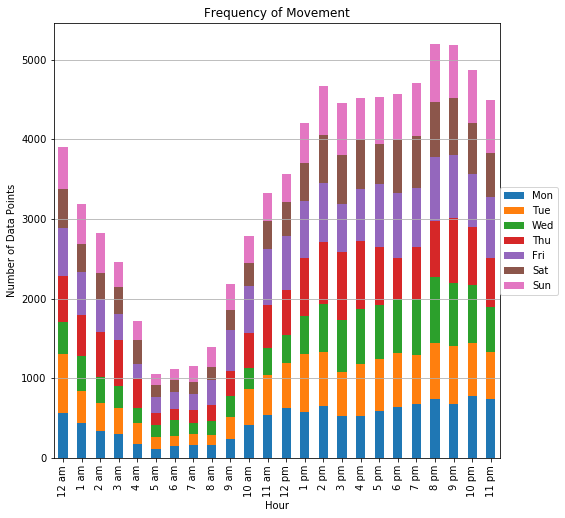

In [15]:
plot_stacked_histogram_of_movement_on_weekdays(gps_data)

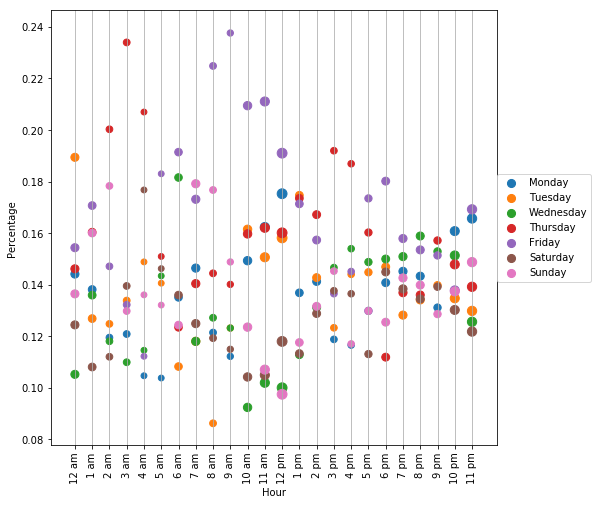

In [16]:
plot_stacked_histogram_percentage_of_movement_on_weekdays(gps_data)

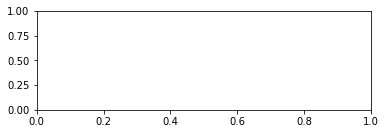

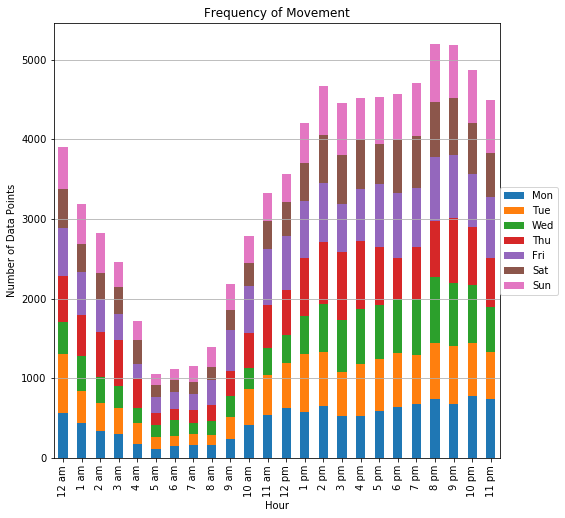

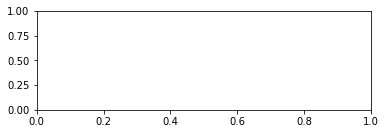

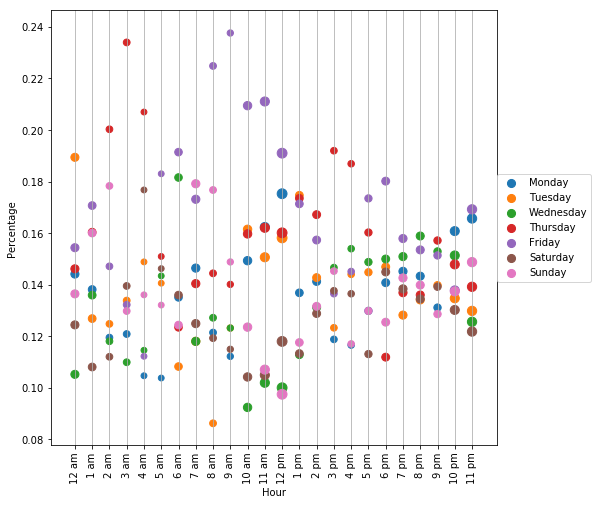

In [18]:
plt.subplot(2,1,1)
plot_stacked_histogram_of_movement_on_weekdays(gps_data)

plt.subplot(2,1,2)
plot_stacked_histogram_percentage_of_movement_on_weekdays(gps_data)

plt.show()